# Marka, Ram, Hafıza, Ekran Boyutu ve İşlemci Özelliklerinin Laptop Fiyatı Üzerindeki Etkilerinin İncelenmesi

Araştırmaya konu veri seti teknolojik ürünler alanında perakende satış yapmak olan Mediamarkt'ın internet sitesinden çekilmiştir.

## Veri Setinin Hazırlanması

In [258]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
url1="https://www.mediamarkt.com.tr/tr/category/_laptop-504926.html?searchParams=&sort=suggested&view=&page=1"
url2="https://www.mediamarkt.com.tr/tr/category/_laptop-504926.html?searchParams=&sort=suggested&view=&page=2"
url3="https://www.mediamarkt.com.tr/tr/category/_laptop-504926.html?searchParams=&sort=suggested&view=&page=3"
url4="https://www.mediamarkt.com.tr/tr/category/_laptop-504926.html?searchParams=&sort=suggested&view=&page=4"

In [5]:
data1=requests.get(url1).text
data2=requests.get(url2).text
data3=requests.get(url3).text
data4=requests.get(url4).text

In [6]:
s1=BeautifulSoup(data1, "html5lib")
s2=BeautifulSoup(data2, "html5lib")
s3=BeautifulSoup(data3, "html5lib")
s4=BeautifulSoup(data4, "html5lib")

In [7]:
df=pd.DataFrame(columns=['Model','Price'])

In [8]:
for val in s1.find_all('div', class_='product-wrapper'):
    mod=val.find('h2').text
    p=val.find('div', class_='price-box').find('div', class_='price small').text
    df=df.append({'Model':mod, 'Price':p}, ignore_index=True)
for val in s2.find_all('div', class_='product-wrapper'):
    mod=val.find('h2').text
    p=val.find('div', class_='price-box').find('div', class_='price small').text
    df=df.append({'Model':mod, 'Price':p}, ignore_index=True)
for val in s3.find_all('div', class_='product-wrapper'):
    mod=val.find('h2').text
    p=val.find('div', class_='price-box').find('div', class_='price small').text
    df=df.append({'Model':mod, 'Price':p}, ignore_index=True)
for val in s4.find_all('div', class_='product-wrapper'):
    mod=val.find('h2').text
    p=val.find('div', class_='price-box').find('div', class_='price small').text
    df=df.append({'Model':mod, 'Price':p}, ignore_index=True)

'df' isimli değişkene tanımlanan veri setinin ham hali aşağıda görülmektedir. Ham haldeki veri seti excel formatında kaydedilmiş ve işlenerek analize hazır hale getirilmiştir.

In [9]:
df

,Model,Price
0,\n\t\t\t\n\t\t\t\tHP Victus/Core i5-13500H İşl...,"27999,-"
1,\n\t\t\t\n\t\t\t\tHUAWEI Matebook D15/ i5-1155...,"14999,-"
2,\n\t\t\t\n\t\t\t\tAPPLE Z1240009K/ Mac Air/ M1...,"25999,-"
3,\n\t\t\t\n\t\t\t\tHUAWEI Matebook D15/ i5-1155...,"12499,-"
4,\n\t\t\t\n\t\t\t\tHP 15S/Core i3-1215U İşlemci...,"9499,-"
...,...,...
104,\n\t\t\t\n\t\t\t\tAPPLE MQKV3TU/A MacBook Air/...,"47499,-"
105,\n\t\t\t\n\t\t\t\tAPPLE MQKX3TU/A MacBook Air/...,"47499,-"
106,\n\t\t\t\n\t\t\t\tAPPLE MPHJ3TU/A MacBook Pro/...,"71999,-"
107,\n\t\t\t\n\t\t\t\tASUS K513EP-L1746W/i5-1135G7...,"16997,-"


In [10]:
path='rawdata.xlsx'

In [11]:
df.to_excel(path)

In [290]:
data2=pd.read_excel('usabledata.xlsx', sheet_name='Sayfa1') # data2, işlenmiş veri setini temsil etmektedir.
data3=pd.read_excel('usabledata.xlsx', sheet_name='Sheet1') # data3, excel ile yapılan metin ayrıştırma işlemi sonucunu göstermektedir.

In [291]:
data3

,Unnamed: 0,Model,Price,Marka,İşlemci,RAM,HAFIZA,EKRAN KARTI,EKRAN BOYUTU,İŞLETİM SİSTEMİ,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Fiyat,Unnamed: 16
0,0,\n\t\t\t\n\t\t\t\tHP Victus/Core i5-13500H İşl...,"27999,-",\n\t\t\t\n\t\t\t\tHP Victus,Core i5-13500H İşlemci,16GB RAM,512GB SSD,RTX 4050 Ekran Kart,"15.6""",WIN11,Gaming Laptop Performans Mavi 7N9U9EA\n\t\t,NaN,NaN,NaN,NaN,27999,-
1,1,\n\t\t\t\n\t\t\t\tHUAWEI Matebook D15/ i5-1155...,"14999,-",\n\t\t\t\n\t\t\t\tHUAWEI Matebook D15,i5-1155G7 İşlemci,8GB Ram,512GB SSD,15.6 inç,Win 11 Laptop Mistik Gümüş\n\t\t,NaN,NaN,NaN,NaN,NaN,NaN,14999,-
2,2,\n\t\t\t\n\t\t\t\tAPPLE Z1240009K/ Mac Air/ M1...,"25999,-",\n\t\t\t\n\t\t\t\tAPPLE Z1240009K,Mac Air,M1,16GB RAM,256GB SSD,13.3 inç,Uzay Grisi\n\t\t,NaN,NaN,NaN,NaN,NaN,25999,-
3,3,\n\t\t\t\n\t\t\t\tHUAWEI Matebook D15/ i5-1155...,"12499,-",\n\t\t\t\n\t\t\t\tHUAWEI Matebook D15,i5-1155G7 İşlemci,8GB Ram,256GB SSD,15.6 inç,Win 11 Laptop Mistik Gümüş\n\t\t,NaN,NaN,NaN,NaN,NaN,NaN,12499,-
4,4,\n\t\t\t\n\t\t\t\tHP 15S/Core i3-1215U İşlemci...,"9499,-",\n\t\t\t\n\t\t\t\tHP 15S,Core i3-1215U İşlemci,8GB RAM,256GB SSD,"15.6"" Win 11",6G0C4EA Laptop Kömür Grisi\n\t\t,NaN,NaN,NaN,NaN,NaN,NaN,9499,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,140,\n\t\t\t\n\t\t\t\tHP Victus 7N9T4EA/ Core i5-1...,"33499,-",\n\t\t\t\n\t\t\t\tHP Victus 7N9T4EA,Core i5-13500H İşlemci,16GB RAM,512GB SSD,RTX4050 Ekran Kartı,"15.6""",Win 11 Laptop Seramik Beyaz\n\t\t,NaN,NaN,NaN,NaN,NaN,33499,-
141,141,\n\t\t\t\n\t\t\t\tAPPLE MQKV3TU/A MacBook Air/...,"47499,-",\n\t\t\t\n\t\t\t\tAPPLE MQKV3TU,A MacBook Air,M2 Çip,8 GB,512 GB,"15""",Yıldız Işığı\n\t\t,NaN,NaN,NaN,NaN,NaN,47499,-
142,142,\n\t\t\t\n\t\t\t\tAPPLE MQKX3TU/A MacBook Air/...,"47499,-",\n\t\t\t\n\t\t\t\tAPPLE MQKX3TU,A MacBook Air,M2 Çip,8 GB,512 GB,"15""",Gece Yarısı\n\t\t,NaN,NaN,NaN,NaN,NaN,47499,-
143,143,\n\t\t\t\n\t\t\t\tAPPLE MPHJ3TU/A MacBook Pro/...,"71999,-",\n\t\t\t\n\t\t\t\tAPPLE MPHJ3TU,A MacBook Pro,M2 PRO,12CPU,19GPU,16GB RAM,1TBSSD,14'',Gümüş\n\t\t,NaN,NaN,NaN,71999,-


In [292]:
data2['Marka']=data2['Marka'].str.replace('\n','')
data2['Marka']=data2['Marka'].str.replace('\t','')

In [459]:
print(data2)
print(data2['Marka'].unique())

      Marka İşlemci  Ram  Hafıza  EkranBoyutu  Fiyat
0        HP      i5   16     512         15.6  27999
1    HUAWEI      i5    8     512         15.6  14999
2     APPLE      m1   16     256         13.3  25999
3    HUAWEI      i5    8     256         15.6  12499
4        HP      i3    8     256         15.6   9499
..      ...     ...  ...     ...          ...    ...
138      HP      i5   16     512         15.6  33499
139   APPLE      m2    8     512         15.0  47499
140   APPLE      m2    8     512         15.0  47499
141   APPLE      m2   16    1024         14.0  71999
142    ASUS      i5    8     512         15.6  16997

[143 rows x 6 columns]
['HP' 'HUAWEI' 'APPLE' 'ACER' 'ASUS' 'CASPER' 'LENOVO']


## ANALİZ

### Kategorik Değişkenlerin Sayısal Verilere Dönüştürülmesi

In [294]:
data2['İşlemci'].unique()

array(['i5', 'm1', 'i3', 'm2', 'i7', 'ryzen3', 'ryzen7', 'ryzen5',
       'athlon', 'i9', 'celeron', 'ryzen9'], dtype=object)

In [295]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

In [296]:
x=data2.iloc[:,1:2]
z=data2.iloc[:,0:1]

In [297]:
x

,İşlemci
0,i5
1,i5
2,m1
3,i5
4,i3
...,...
138,i5
139,m2
140,m2
141,m2


In [298]:
z

,Marka
0,HP
1,HUAWEI
2,APPLE
3,HUAWEI
4,HP
...,...
138,HP
139,APPLE
140,APPLE
141,APPLE


In [299]:
x=le.fit_transform(x)
z=le.fit_transform(z)

In [300]:
x

array([ 3,  3,  6,  3,  2,  6,  2,  7,  3,  3,  3,  3,  4,  7,  4,  3,  3,
        3,  8,  7,  7,  6, 10, 10,  4,  9,  3,  9,  4,  0,  7,  5,  3,  3,
        3,  3,  3,  3,  6,  3,  2,  6,  2,  7,  3,  3,  3,  4,  7,  4,  3,
        3,  3,  8,  7,  7,  6, 10, 10,  9,  3,  9,  4,  0,  7,  5,  3,  3,
        3,  3,  3,  3,  3,  2,  1,  5,  3,  4,  3,  4,  9,  4,  9,  7,  3,
        7,  1,  7,  7,  3,  3,  9,  2,  7,  4,  9, 10, 11,  3,  9,  3,  4,
        9,  3,  7,  2,  3,  7,  6,  7,  4,  3,  3,  7,  7,  7,  3,  7,  7,
       11,  7,  7,  7,  3,  3,  4,  3,  7,  7,  7,  7,  7,  8,  7,  3,  4,
        7,  9,  3,  7,  7,  7,  3])

In [301]:
z

array([4, 5, 1, 5, 4, 1, 0, 1, 4, 4, 2, 2, 2, 1, 3, 6, 5, 4, 6, 1, 1, 1,
       6, 6, 2, 6, 2, 6, 2, 6, 1, 4, 0, 3, 3, 6, 4, 5, 1, 5, 4, 1, 0, 1,
       4, 4, 2, 2, 1, 3, 6, 5, 4, 6, 1, 1, 1, 6, 6, 6, 2, 6, 2, 6, 1, 4,
       0, 3, 3, 6, 2, 0, 2, 2, 3, 2, 3, 4, 3, 0, 6, 2, 6, 1, 6, 1, 6, 1,
       1, 6, 3, 6, 6, 1, 2, 6, 6, 6, 3, 6, 4, 6, 6, 6, 1, 3, 4, 1, 1, 1,
       6, 0, 3, 1, 1, 1, 3, 1, 1, 6, 1, 1, 1, 6, 6, 2, 2, 1, 1, 1, 1, 1,
       6, 1, 5, 2, 1, 6, 4, 1, 1, 1, 2])

In [302]:
x=x.reshape(-1,1)
z=z.reshape(-1,1)

In [303]:
x=ohe.fit_transform(x)
z=ohe.fit_transform(z)

In [304]:
x=x.toarray()
z=z.toarray()

In [305]:
x=pd.DataFrame(data=x, columns=['athlon','celeron','i3','i5','i7','i9','m1','m2','ryzen3','ryzen5','ryzen7','ryzen9'])
z=pd.DataFrame(data=z, columns=['Acer','Apple','Asus','Casper','HP','Huawei','Lenovo'])

In [306]:
x

,athlon,celeron,i3,i5,i7,i9,m1,m2,ryzen3,ryzen5,ryzen7,ryzen9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [307]:
z

,Acer,Apple,Asus,Casper,HP,Huawei,Lenovo
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,0.0,1.0,0.0,0.0
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0
140,0.0,1.0,0.0,0.0,0.0,0.0,0.0
141,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Bağımlı ve Bağımsız Değişken Olarak Ayrıştırma İşlemi

In [308]:
x1=data2.iloc[:,2:5]

In [309]:
X=pd.concat([z,x,x1], axis=1)

In [310]:
X #bağımsız değişkenler markalar, işlemciler, ram, hafıza ve ekran boyutu

,Acer,Apple,Asus,Casper,HP,Huawei,Lenovo,athlon,celeron,i3,...,i9,m1,m2,ryzen3,ryzen5,ryzen7,ryzen9,Ram,Hafıza,EkranBoyutu
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,512,15.6
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,512,15.6
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16,256,13.3
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,256,15.6
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,256,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,512,15.6
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,512,15.0
140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,512,15.0
141,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16,1024,14.0


In [311]:
y=data2.iloc[:,-1:]

In [312]:
y #bağımlı değişken,fiyat

,Fiyat
0,27999
1,14999
2,25999
3,12499
4,9499
...,...
138,33499
139,47499
140,47499
141,71999


### Ön İstatiksel Analiz

In [313]:
y.describe()

,Fiyat
count,143.000000
mean,29300.734266
std,19899.556983
min,5999.000000
25%,14999.000000
50%,23499.000000
75%,39549.000000
max,119999.000000


In [314]:
X.iloc[:,-3:].describe()

,Ram,Hafıza,EkranBoyutu
count,143.000000,143.000000,143.000000
mean,11.496503,507.524476,15.013287
std,5.811443,327.975777,1.034833
min,4.000000,120.000000,13.300000
25%,8.000000,256.000000,14.000000
50%,8.000000,512.000000,15.600000
75%,16.000000,512.000000,15.600000
max,32.000000,2048.000000,18.000000


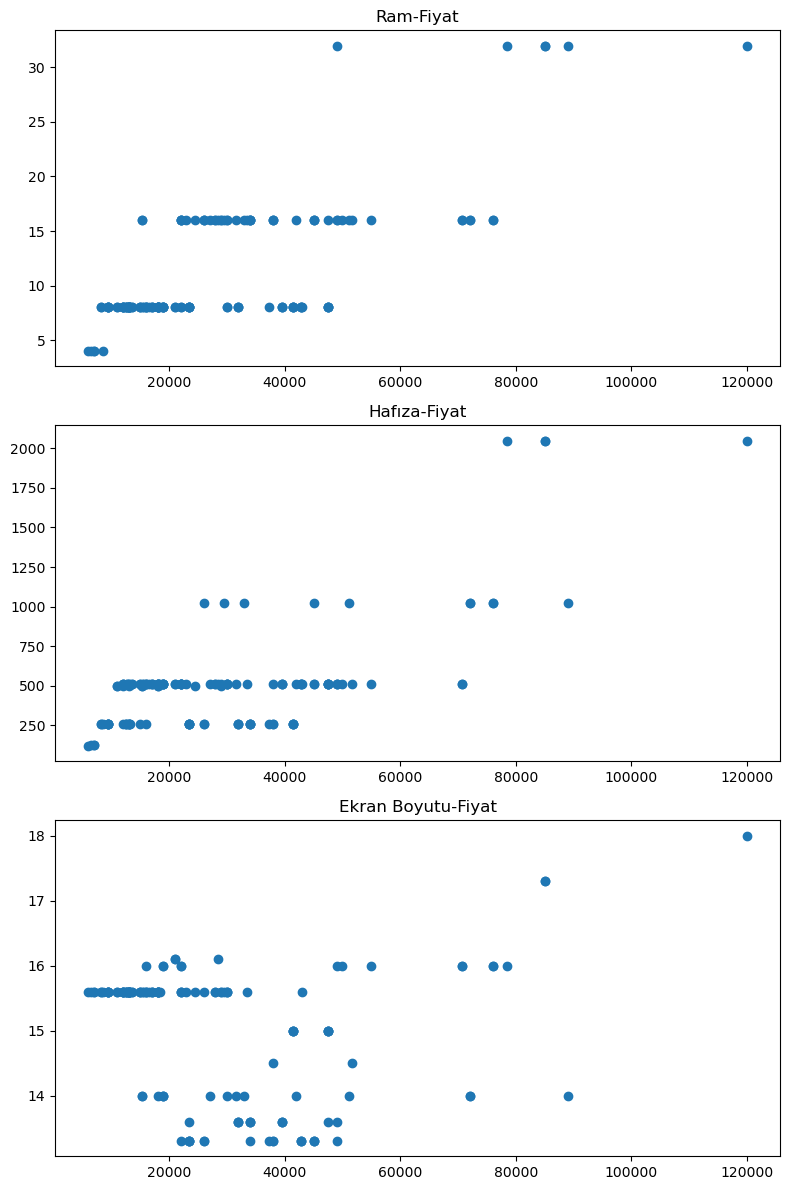

In [315]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8, 12))

ax1.scatter(y,X['Ram'])
ax1.set_title('Ram-Fiyat')

ax2.scatter(y, X['Hafıza'])
ax2.set_title('Hafıza-Fiyat')

ax3.scatter(y, X['EkranBoyutu'])
ax3.set_title('Ekran Boyutu-Fiyat')

plt.tight_layout()
plt.show()

In [316]:
full_data=pd.concat([y,X],axis=1)

In [317]:
Apple=full_data.copy()
Apple.set_index('Apple', inplace=True)
Apple=Apple.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
Apple.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,43.000000,43.000000,43.000000,43.000000
mean,43710.627907,12.093023,446.511628,14.000000
std,16166.329785,5.051233,244.099938,0.896554
min,23499.000000,8.000000,256.000000,13.300000
25%,33999.000000,8.000000,256.000000,13.300000
50%,41499.000000,8.000000,512.000000,13.600000
75%,47499.000000,16.000000,512.000000,15.000000
max,89099.000000,32.000000,1024.000000,16.000000


In [318]:
Asus=full_data.copy()
Asus.set_index('Asus', inplace=True)
Asus=Asus.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
Asus.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,20.000000,20.000000,20.000000,20.000000
mean,32196.400000,12.200000,640.000000,15.405000
std,25173.778305,6.287833,393.975687,0.981124
min,8499.000000,4.000000,256.000000,13.300000
25%,17748.500000,8.000000,512.000000,15.600000
50%,24499.000000,8.000000,512.000000,15.600000
75%,43499.000000,16.000000,512.000000,15.600000
max,119999.000000,32.000000,2048.000000,18.000000


In [319]:
Acer=full_data.copy()
Acer.set_index('Acer', inplace=True)
Acer=Acer.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
Acer.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,7.000000,7.0,7.000000,7.000000e+00
mean,14713.285714,8.0,402.285714,1.560000e+01
std,5794.085654,4.0,187.372814,1.918685e-15
min,6999.000000,4.0,128.000000,1.560000e+01
25%,11499.000000,6.0,320.000000,1.560000e+01
50%,15999.000000,8.0,512.000000,1.560000e+01
75%,16999.000000,8.0,512.000000,1.560000e+01
max,22999.000000,16.0,512.000000,1.560000e+01


In [320]:
Casper=full_data.copy()
Casper.set_index('Casper', inplace=True)
Casper=Casper.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
Casper.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,14.000000,14.000000,14.000000,14.000000
mean,18399.000000,11.714286,548.571429,15.371429
std,7824.222743,4.564555,225.434184,0.581018
min,5999.000000,4.000000,120.000000,14.000000
25%,12249.000000,8.000000,500.000000,15.600000
50%,16649.000000,12.000000,500.000000,15.600000
75%,25624.000000,16.000000,500.000000,15.600000
max,29499.000000,16.000000,1024.000000,15.600000


In [321]:
Huawei=full_data.copy()
Huawei.set_index('Huawei', inplace=True)
Huawei=Huawei.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
Huawei.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,7.000000,7.000000,7.000000,7.000000
mean,16041.857143,10.285714,402.285714,15.714286
std,4198.752649,3.903600,136.837756,0.195180
min,12499.000000,8.000000,256.000000,15.600000
25%,12899.000000,8.000000,256.000000,15.600000
50%,14999.000000,8.000000,512.000000,15.600000
75%,18499.000000,12.000000,512.000000,15.800000
max,21999.000000,16.000000,512.000000,16.000000


In [322]:
HP=full_data.copy()
HP.set_index('HP', inplace=True)
HP=HP.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
HP.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,16.000000,16.000000,16.000000,16.000000
mean,27242.750000,13.000000,656.000000,15.906250
std,23696.384218,8.197561,552.776266,0.579044
min,9499.000000,8.000000,256.000000,15.600000
25%,12699.000000,8.000000,512.000000,15.600000
50%,19499.000000,8.000000,512.000000,15.600000
75%,28124.000000,16.000000,512.000000,16.100000
max,84999.000000,32.000000,2048.000000,17.300000


In [323]:
Lenovo=full_data.copy()
Lenovo.set_index('Lenovo', inplace=True)
Lenovo=Lenovo.loc[1.0,['Fiyat','Ram','Hafıza','EkranBoyutu']]
Lenovo.describe()

,Fiyat,Ram,Hafıza,EkranBoyutu
count,36.00000,36.000000,36.000000,36.000000
mean,21049.00000,10.555556,465.777778,15.219444
std,14821.05645,6.133954,300.034961,0.778577
min,6499.00000,4.000000,128.000000,13.300000
25%,12999.00000,8.000000,256.000000,14.500000
50%,16249.00000,8.000000,512.000000,15.600000
75%,21999.00000,8.000000,512.000000,15.600000
max,78499.00000,32.000000,2048.000000,16.000000


In [324]:
list_mean=pd.DataFrame(np.sort(np.array([y.mean().values,[Acer['Fiyat'].mean()],[Asus['Fiyat'].mean()],[Apple['Fiyat'].mean()],[Casper['Fiyat'].mean()],[Huawei['Fiyat'].mean()],[HP['Fiyat'].mean()],[Lenovo['Fiyat'].mean()]])),
             index=['Total','Acer','Asus','Apple','Casper','Huawei','HP','Lenovo'],
                   columns=['Means'])

In [325]:
list_mean

,Means
Total,29300.734266
Acer,14713.285714
Asus,32196.400000
Apple,43710.627907
Casper,18399.000000
Huawei,16041.857143
HP,27242.750000
Lenovo,21049.000000


In [326]:
fig = px.bar(x=list_mean.index, y=list_mean['Means'], title='Marka Özelinde Fiyat Ortalamaları',
            labels={'y':'Ortalama Fiyatlar', 'x':'Markalar'},
            text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### Lineer Regresyon

#### Regresyon1

In [327]:
import statsmodels.api as sm

In [371]:
cons=pd.DataFrame(np.ones(len(y)), columns=['Sabit'])

In [372]:
x_1=pd.DataFrame(X.iloc[:,[0,1,2,3,4,19,20,21]])

In [373]:
X_1=pd.concat([cons,x_1],axis=1)

In [374]:
res=sm.OLS(y,X_1).fit()

In [375]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     118.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           7.07e-57
Time:                        13:50:09   Log-Likelihood:                -1468.7
No. Observations:                 143   AIC:                             2955.
Df Residuals:                     134   BIC:                             2982.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Sabit        -6.27e+04   1.25e+04     -5.026      

In [376]:
resid1=res.resid

#### Regresyon2

In [377]:
x_2=pd.DataFrame(X.iloc[:,-3:])

In [378]:
X_2=pd.concat([cons,x_2],axis=1)

In [379]:
res1=sm.OLS(y,X_2).fit()

In [380]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     79.91
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           4.20e-30
Time:                        13:50:25   Log-Likelihood:                -1546.2
No. Observations:                 143   AIC:                             3100.
Df Residuals:                     139   BIC:                             3112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Sabit         6.45e+04   1.59e+04      4.069      

In [381]:
resid2=res1.resid

#### Kalıntıların Dağılımı

In [382]:
def normal_dist(x):
    x=np.asarray(x).reshape(len(x),1)
    scaler = preprocessing.StandardScaler().fit(x)
    X_scaled = scaler.transform(x)
    plt.hist(X_scaled, bins=30, density=True, alpha=0.5)
    mu, std = np.mean(X_scaled), np.std(X_scaled)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-(x-mu)**2/(2*std**2))/(std*np.sqrt(2*np.pi))
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlabel('Data')
    plt.ylabel('Olaslık Yoğunluğu')
    plt.title('Normal Dağılım')
    plt.show()

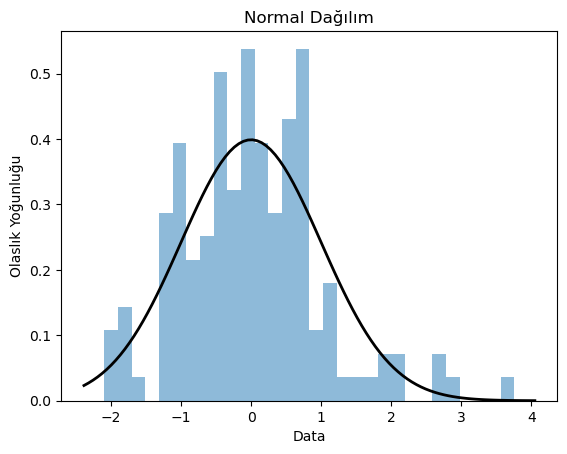

In [383]:
normal_dist(resid1)

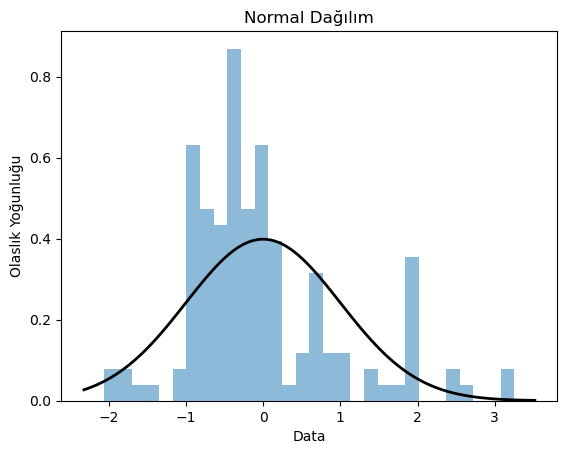

In [430]:
normal_dist(resid2)